In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.widgets import Cursor
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.stats import norm
from sympy import *
plt.rcParams.update({'font.size': 12})
formatter = mticker.ScalarFormatter(useMathText=True)
plt.rcParams["axes.formatter.use_mathtext"] = True

In [2]:
# def gaussiana(x, sigma, mi):
#     return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x - mi)**2/(2*sigma**2)) + 600

def gaussiana(x, sigma, mi, a, H):
    return a*np.exp(-(x - mi)**2/(2*sigma**2)) + H

def gaussiana_fit(dados_x, dados_y):

    media = sum(dados_x*dados_y)/sum(dados_y)
    sigma =np.sqrt(sum(dados_y* (dados_x - media)**2)/sum(dados_y))
    popt, pcov = curve_fit(
    f = gaussiana,
    xdata = dados_x,
    ydata = dados_y,
    p0 = [media, sigma, 1, 1],
    maxfev=100000
)
    return [popt, np.sqrt(np.diag(pcov))]

In [3]:
gauss_kbr = pd.read_csv('./Dados/kbr_18.csv',sep='\s', decimal=',')
gauss_kbr_x = np.array(gauss_kbr['Ângulo'])
gauss_kbr_y = np.array(gauss_kbr['R'])
c = 299792458
h = 4.135668e-15
d = 3.295e-10
gauss_kbr_x_e = 1e-3 * h*c/(2*d*np.sin(gauss_kbr_x * np.pi/180))


C:\Users\victo\AppData\Local\Temp\ipykernel_21852\156414953.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  gauss_kbr = pd.read_csv('./Dados/kbr_18.csv',sep='\s', decimal=',')


Plot

In [4]:
# par = gaussiana_fit(gauss_kbr_x[35:45], gauss_kbr_y[35:45])
# par[1]

In [5]:
par = gaussiana_fit(gauss_kbr_x[35:45], gauss_kbr_y[35:45])
x_model = np.linspace(min(gauss_kbr_x[35:45]), max(gauss_kbr_x[35:45]))  
gaussiana(x_model, par[0][0], par[0][1], par [0][2], par[0][3])



array([10.8751896 , 11.30931052, 11.73107564, 12.14048403, 12.53753479,
       12.92222706, 13.29455998, 13.65453274, 14.00214454, 14.33739462,
       14.66028225, 14.9708067 , 15.26896731, 15.55476341, 15.82819437,
       16.0892596 , 16.33795852, 16.57429058, 16.79825526, 17.00985207,
       17.20908055, 17.39594025, 17.57043078, 17.73255173, 17.88230276,
       18.01968353, 18.14469375, 18.25733313, 18.35760144, 18.44549845,
       18.52102396, 18.58417782, 18.63495988, 18.67337002, 18.69940818,
       18.71307428, 18.7143683 , 18.70329024, 18.67984012, 18.64401799,
       18.59582392, 18.53525804, 18.46232047, 18.37701136, 18.27933092,
       18.16927934, 18.04685688, 17.91206381, 17.76490041, 17.60536702])

In [6]:
par[1][0]

26312.628594517813

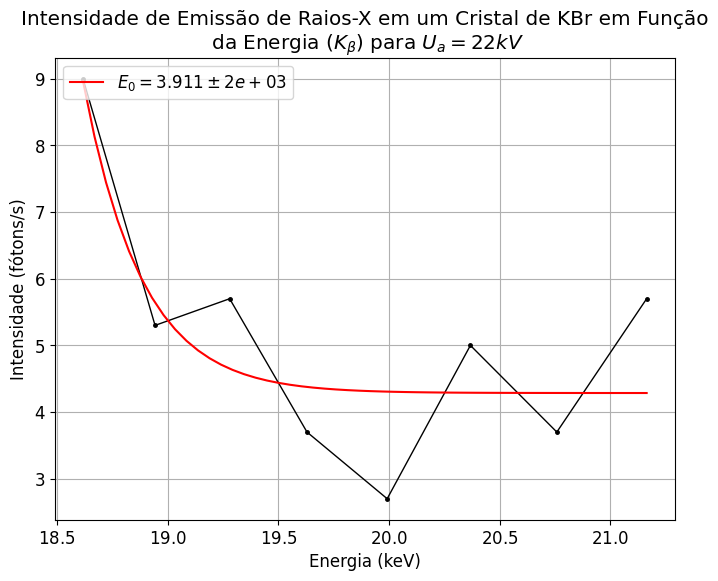

In [7]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

def gaussiana_plot(dados_x, dados_y, color_plot):
    par = gaussiana_fit(dados_x, dados_y)
    x_model = np.linspace(min(dados_x), max(dados_x))  
    y_model = gaussiana(x_model, par[0][0], par[0][1], par[0][2], par[0][3])
    grafico.plot(x_model, y_model, color = color_plot, label = f'$E_0 = {par[0][1]:.4} \pm {par[1][1]:.1}$')

# plot dos pontos:
grafico3 = grafico.plot(gauss_kbr_x_e[26:34], gauss_kbr_y[26:34], marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste
gaussiana_plot(gauss_kbr_x_e[26:34], gauss_kbr_y[26:34], 'red')

# grafico.axvline(x = x_encontro, color = 'blue', label = f'$V_0$ = {x_encontro: .2} V', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Energia (keV)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X em um Cristal de KBr em Função\n da Energia ($K_\\beta$) para $U_a = 22kV$') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr26graus.png')
plt.show()


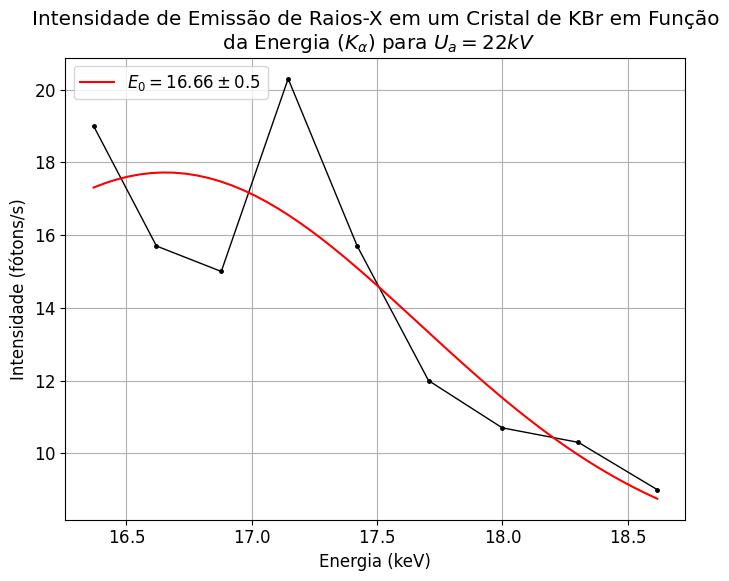

In [8]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

def gaussiana_plot(dados_x, dados_y, color_plot):
    par = gaussiana_fit(dados_x, dados_y)
    x_model = np.linspace(min(dados_x), max(dados_x))  
    y_model = gaussiana(x_model, par[0][0], par[0][1], par[0][2], par[0][3])
    grafico.plot(x_model, y_model, color = color_plot, label = f'$E_0 = {par[0][1]:.4} \pm {par[1][1]:.1}$')

# plot dos pontos:
grafico3 = grafico.plot(gauss_kbr_x_e[33:42], gauss_kbr_y[33:42], marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste
gaussiana_plot(gauss_kbr_x_e[33:42], gauss_kbr_y[33:42], 'red')

#grafico.axvline(x = x_encontro, color = 'blue', label = f'$V_0$ = {x_encontro: .2} V', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Energia (keV)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X em um Cristal de KBr em Função\n da Energia ($K_\\alpha$) para $U_a = 22kV$') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()


In [15]:
i = 2
while gauss_kbr_y[i] < max(gauss_kbr_y)*0.25:
    i += 1
l = 2*d*np.sin(gauss_kbr_x[i+1]*np.pi/180)
h = 10e3*18*l/c
h

4.067230641840635e-14

In [16]:
gauss_kbr_x[i]

5.8

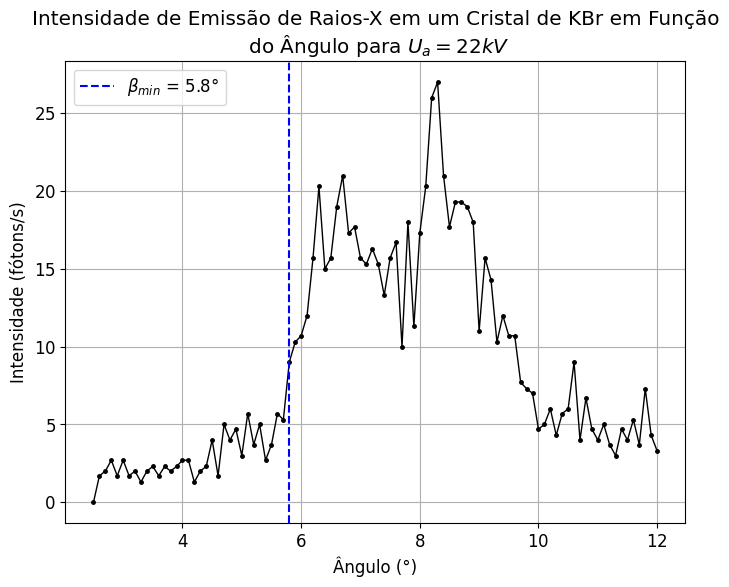

In [17]:

graphWidth = 800
graphHeight = 600

f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
grafico = f.add_subplot(111)

# plot dos pontos:
grafico3 = grafico.plot(gauss_kbr_x, gauss_kbr_y, marker = '.', markersize=5, color = 'black', linewidth = 1)


# plot do ajuste

grafico.axvline(x = gauss_kbr_x[i], color = 'blue', label = '$\\beta_{min}$ =' + f'{gauss_kbr_x[i]: .2}°', linestyle = '--')


grafico.grid(True)
grafico.set_xlabel('Ângulo (°)') # eixo x
grafico.set_ylabel('Intensidade (fótons/s)') # eixo y
grafico.set_title('Intensidade de Emissão de Raios-X em um Cristal de KBr em Função\n do Ângulo para $U_a = 22kV$') #título
grafico.legend(loc = 'upper left', fontsize= 12)

#    plt.savefig('Acr25graus.png')
plt.show()
